In [1]:
import numpy as np
import Acceleration as Ace
import scvelo as scv
import MyCodePloting as mc
import MyCodeTools as mt
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.10.2) on 2023-05-05 23:26.


In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [3]:
adata = scv.datasets.gastrulation_erythroid()
adata

AnnData object with n_obs × n_vars = 9815 × 53801
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm'
    uns: 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

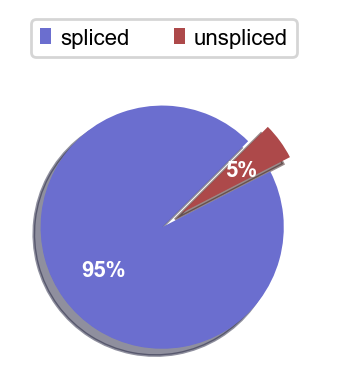

In [4]:
scv.pl.proportions(adata)

In [5]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 47456 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


In [6]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 51 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.


In [7]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:01:49) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [8]:
Spliced = adata.to_df(layer='Ms')+1
Unspliced = adata.to_df(layer='Mu')+1

In [9]:
scv.tl.velocity(adata)
gamma = adata.var['velocity_gamma']
acc = Unspliced - (1+gamma)*Unspliced + (gamma**2)*(Spliced)   # Mu - (1+gamma)*Mu + (gamma**2)*Ms
acc

computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


index            Arfgef1     Tram1      Bag2     Uggt1      Rev1      Aff3  \
AAAGATCTCTCGAA -0.247042 -0.050127 -0.031749 -0.163330  0.429488  7.006874   
AATCTCACTGCTTT -0.235765 -0.049282 -0.034073 -0.155185  0.244848  5.619774   
AATGGCTGAAGATG -0.230425 -0.049678 -0.032027 -0.170163  0.373955  6.548784   
ACACATCTGTCAAC -0.250676 -0.051167 -0.033127 -0.168089  0.050510  7.282732   
ACGACAACTGGAGG -0.234944 -0.054288 -0.031634 -0.155946  0.286339  7.222571   
...                  ...       ...       ...       ...       ...       ...   
TTTCACGACTGGTA -0.244059 -0.050261 -0.032536 -0.166131 -0.110978  7.733607   
TTTCAGTGCGAGTT -0.252290 -0.052309 -0.031765 -0.169393  0.353099  7.418077   
TTTCGAACGGTGAG -0.241761 -0.050752 -0.031963 -0.185129  0.051814  7.584414   
TTTCGAACTAACCG -0.229861 -0.049606 -0.031425 -0.168487 -0.115429  7.733607   
TTTCTACTTCTCTA -0.230360 -0.050056 -0.032133 -0.171971  0.060685  7.673627   

index               Uxs1     Tex30    Kdelc1  Slc39a10  ...     Prps1  \
AAAGATCTCTCGAA -0.138539 -0.014490  0.195110 -0.066747  ... -0.015169   
AATCTCACTGCTTT -0.145948 -0.015003  0.147695 -0.070934  ... -0.014714   
AATGGCTGAAGATG -0.155413 -0.014796  0.091003 -0.067431  ... -0.015304   
ACACATCTGTCAAC -0.148482 -0.014941  0.041972 -0.065552  ... -0.014821   
ACGACAACTGGAGG -0.140271 -0.014654  0.045400 -0.066438  ... -0.014933   
...                  ...       ...       ...       ...  ...       ...   
TTTCACGACTGGTA -0.147274 -0.014870  0.073059 -0.069516  ... -0.014976   
TTTCAGTGCGAGTT -0.149413 -0.014898 -0.035439 -0.067624  ... -0.015505   
TTTCGAACGGTGAG -0.153400 -0.015335  0.049448 -0.065949  ... -0.015253   
TTTCGAACTAACCG -0.164769 -0.014839  0.060514 -0.066020  ... -0.015170   
TTTCTACTTCTCTA -0.162190 -0.014933  0.089846 -0.066807  ... -0.015204   

index              Alas2   Sh3kbp1     Rbbp7     Gpm6b   Arhgap6       Uty  \
AAAGATCTCTCGAA -0.009246 -0.291853 -0.024592 -0.073348  1.368707  1.828318   
AATCTCACTGCTTT -0.009003 -0.273622 -0.025095 -0.079493  0.920890  1.676987   
AATGGCTGAAGATG -0.008984 -0.255903 -0.025846 -0.077182  1.220845  1.881234   
ACACATCTGTCAAC -0.009001 -0.236948 -0.027531 -0.073271  1.052813  1.869660   
ACGACAACTGGAGG -0.009000 -0.201185 -0.026992 -0.072951  1.545243  1.882216   
...                  ...       ...       ...       ...       ...       ...   
TTTCACGACTGGTA -0.008839 -0.228587 -0.025119 -0.073648  1.440569  1.919438   
TTTCAGTGCGAGTT -0.008995 -0.248035 -0.025333 -0.073648  1.072256  1.919438   
TTTCGAACGGTGAG -0.008519 -0.223608 -0.024027 -0.073648  1.178986  1.872017   
TTTCGAACTAACCG -0.008566 -0.220391 -0.024100 -0.073648  1.117756  1.642551   
TTTCTACTTCTCTA -0.009055 -0.220943 -0.024752 -0.075111  1.068847  1.856940   

index              Ddx3y   Eif2s3y   Gm47283  
AAAGATCTCTCGAA  0.260677 -0.178500 -0.127354  
AATCTCACTGCTTT  0.138819 -0.207356 -0.144504  
AATGGCTGAAGATG  0.018383 -0.186571 -0.106873  
ACACATCTGTCAAC -0.104714 -0.198982 -0.136254  
ACGACAACTGGAGG -0.308654 -0.182139 -0.140897  
...                  ...       ...       ...  
TTTCACGACTGGTA -0.302986 -0.181026 -0.145763  
TTTCAGTGCGAGTT -0.597966 -0.181149 -0.173273  
TTTCGAACGGTGAG -0.748587 -0.189101 -0.144120  
TTTCGAACTAACCG -0.571015 -0.178335 -0.139912  
TTTCTACTTCTCTA -0.529382 -0.175767 -0.129714  

[9815 rows x 1949 columns]

In [10]:
adata.layers['acc'] = acc
Ace.acc_graph(adata)

computing acceleration graph (using 1/8 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:04:53) --> added 
    'acc_graph', sparse matrix with cosine correlations (adata.uns)


computing acc embedding
    finished (0:00:04) --> added
    'acc_umap', embedded acc vectors (adata.obsm)


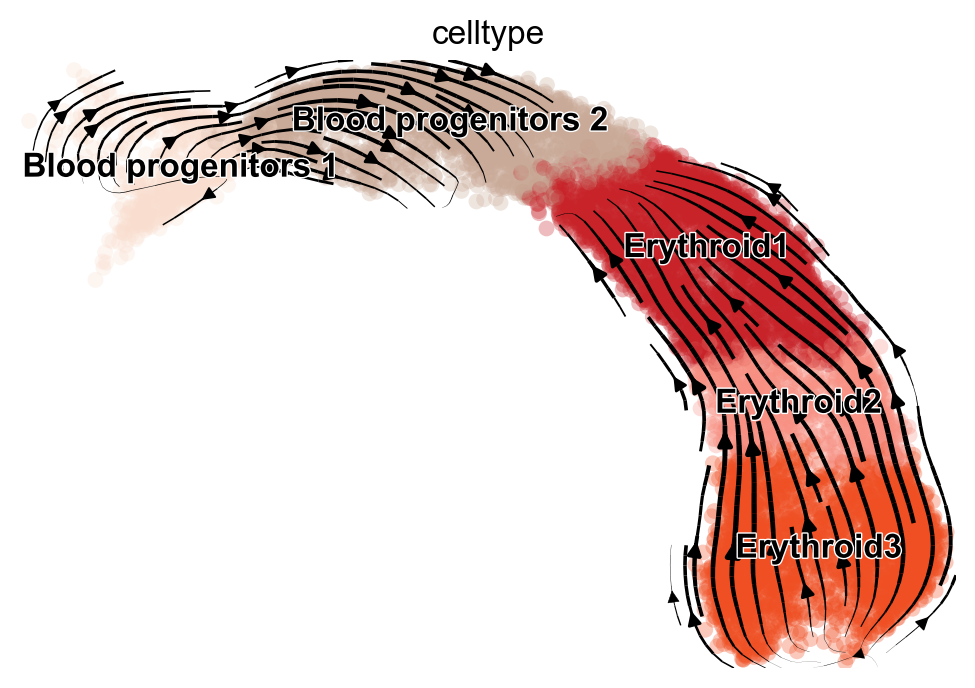

In [11]:
mc.acc_embedding_stream(adata, color="celltype")

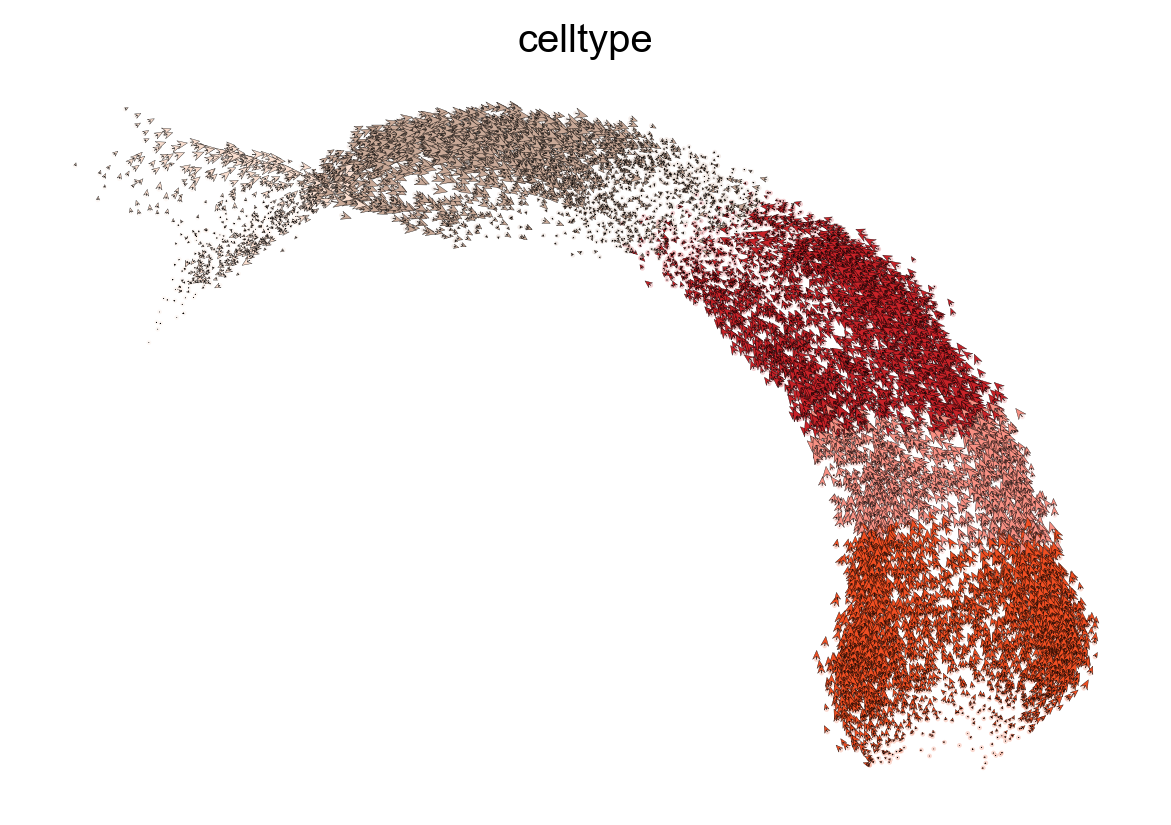

In [12]:
mc.acc_embedding(adata, color="celltype", basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

--> added 'acc_length' (adata.obs)
--> added 'acc_confidence' (adata.obs)
--> added 'acc_confidence_transition' (adata.obs)


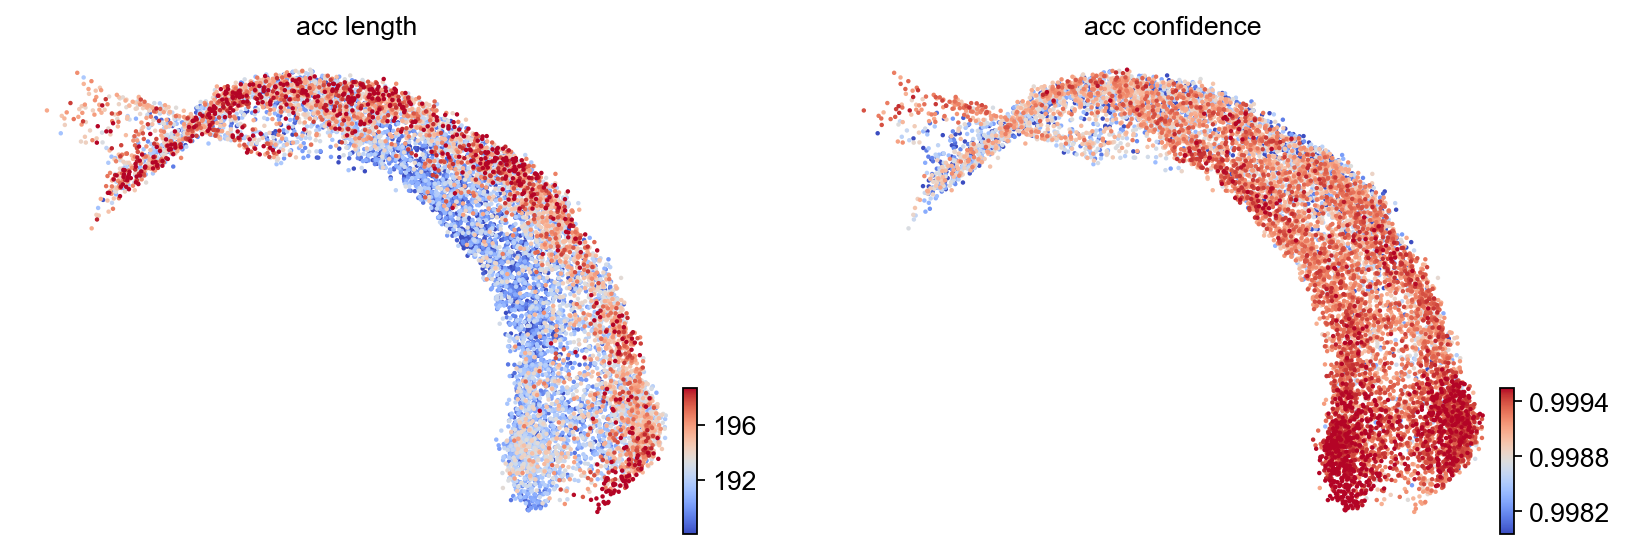

In [13]:
mt.acc_confidence(adata)
keys = 'acc_length', 'acc_confidence'
mc.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

#### Steady State

In [14]:
gamma1 = Spliced/Unspliced
acc1 = Unspliced - (1+gamma1)*Unspliced + (gamma1**2)*(Spliced)   # Mu - (1+gamma)*Mu + (gamma**2)*Ms
acc1

index            Arfgef1     Tram1       Bag2     Uggt1      Rev1      Aff3  \
AAAGATCTCTCGAA  0.181242  6.031884   9.120647  1.285703  0.078299 -0.489170   
AATCTCACTGCTTT  0.325674  4.337744   5.945542  1.369985 -0.156472 -0.704265   
AATGGCTGAAGATG  0.380849  6.480682  14.398726  0.229089  0.038302 -0.541849   
ACACATCTGTCAAC  0.142404  4.969260   9.177042  0.208641 -0.324946 -0.352800   
ACGACAACTGGAGG  0.156721  2.444231  10.559797  0.758210 -0.107224 -0.349299   
...                  ...       ...        ...       ...       ...       ...   
TTTCACGACTGGTA  0.024501  1.922621   2.388567  0.322178 -0.437433  0.000000   
TTTCAGTGCGAGTT -0.069233  1.000177   8.933762  0.045215  0.009866 -0.165808   
TTTCGAACGGTGAG  0.082422  1.086303   6.776051 -0.004843 -0.327487 -0.084030   
TTTCGAACTAACCG  0.115782  3.419182  13.515947  0.298444 -0.449621  0.000000   
TTTCTACTTCTCTA  0.108184  2.341867   5.202746  0.193558 -0.309801 -0.035120   

index               Uxs1      Tex30    Kdelc1  Slc39a10  ...       Prps1  \
AAAGATCTCTCGAA  1.809899  54.728291  0.162051  0.772520  ...   45.266399   
AATCTCACTGCTTT  1.306674  42.192169  0.075805  1.410475  ...   68.689529   
AATGGCTGAAGATG  0.875109  48.441368 -0.030438  0.928790  ...  113.917213   
ACACATCTGTCAAC  1.222071  31.812819 -0.105180  0.212199  ...   48.852856   
ACGACAACTGGAGG  1.861481  29.325098 -0.099858  1.055054  ...   92.017853   
...                  ...        ...       ...       ...  ...         ...   
TTTCACGACTGGTA  0.268375   9.593094 -0.055132  0.147532  ...   27.331747   
TTTCAGTGCGAGTT  0.392459   8.006710 -0.213802  0.128077  ...   13.961838   
TTTCGAACGGTGAG  0.341118   5.892219 -0.093513  0.028952  ...   27.922493   
TTTCGAACTAACCG  0.140774  11.648273 -0.075821  0.000000  ...   10.482525   
TTTCTACTTCTCTA  0.128098   6.212849 -0.026341  0.114406  ...   31.556610   

index                Alas2   Sh3kbp1       Rbbp7     Gpm6b   Arhgap6  \
AAAGATCTCTCGAA    2.609518 -0.211502   79.830429  0.100168  0.168668   
AATCTCACTGCTTT    1.100767  0.010696  141.586288  0.026044 -0.199834   
AATGGCTGAAGATG    2.372085 -0.015260  183.859756  0.230607  0.036755   
ACACATCTGTCAAC    1.210314  0.193554   32.610752  0.128040 -0.147801   
ACGACAACTGGAGG    1.302575  0.517433   88.613609  0.253952  0.380919   
...                    ...       ...         ...       ...       ...   
TTTCACGACTGGTA  250.556030  0.025959   97.071526  0.000000  0.273429   
TTTCAGTGCGAGTT  319.721497 -0.109824   73.251564  0.000000 -0.052356   
TTTCGAACGGTGAG  362.665436  0.000000  127.684555  0.000000  0.045394   
TTTCGAACTAACCG  281.747711  0.058875  120.665001  0.000000  0.000000   
TTTCTACTTCTCTA  243.577469  0.048421  107.160622 -0.035587 -0.056113   

index                Uty     Ddx3y   Eif2s3y    Gm47283  
AAAGATCTCTCGAA -0.143073  0.668777  0.511178   8.028317  
AATCTCACTGCTTT -0.206905  0.298633  0.321954   7.149122  
AATGGCTGAAGATG -0.088575  0.016332  0.414546  12.294243  
ACACATCTGTCAAC -0.048614 -0.200417  0.258921   9.321812  
ACGACAACTGGAGG -0.234207 -0.460880  1.527033   4.785017  
...                  ...       ...       ...        ...  
TTTCACGACTGGTA  0.000000 -0.416284  0.084468   3.043207  
TTTCAGTGCGAGTT  0.000000 -0.616020  0.079766   3.283613  
TTTCGAACGGTGAG -0.046393 -0.681151  0.122881   5.365801  
TTTCGAACTAACCG -0.230998 -0.596706  0.194400   7.193550  
TTTCTACTTCTCTA -0.060468 -0.597113  0.312180   5.173583  

[9815 rows x 1949 columns]

In [15]:
adata.layers['acc'] = acc1
Ace.acc_graph(adata)

computing acceleration graph (using 1/8 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:04:33) --> added 
    'acc_graph', sparse matrix with cosine correlations (adata.uns)


computing acc embedding
    finished (0:00:04) --> added
    'acc_umap', embedded acc vectors (adata.obsm)


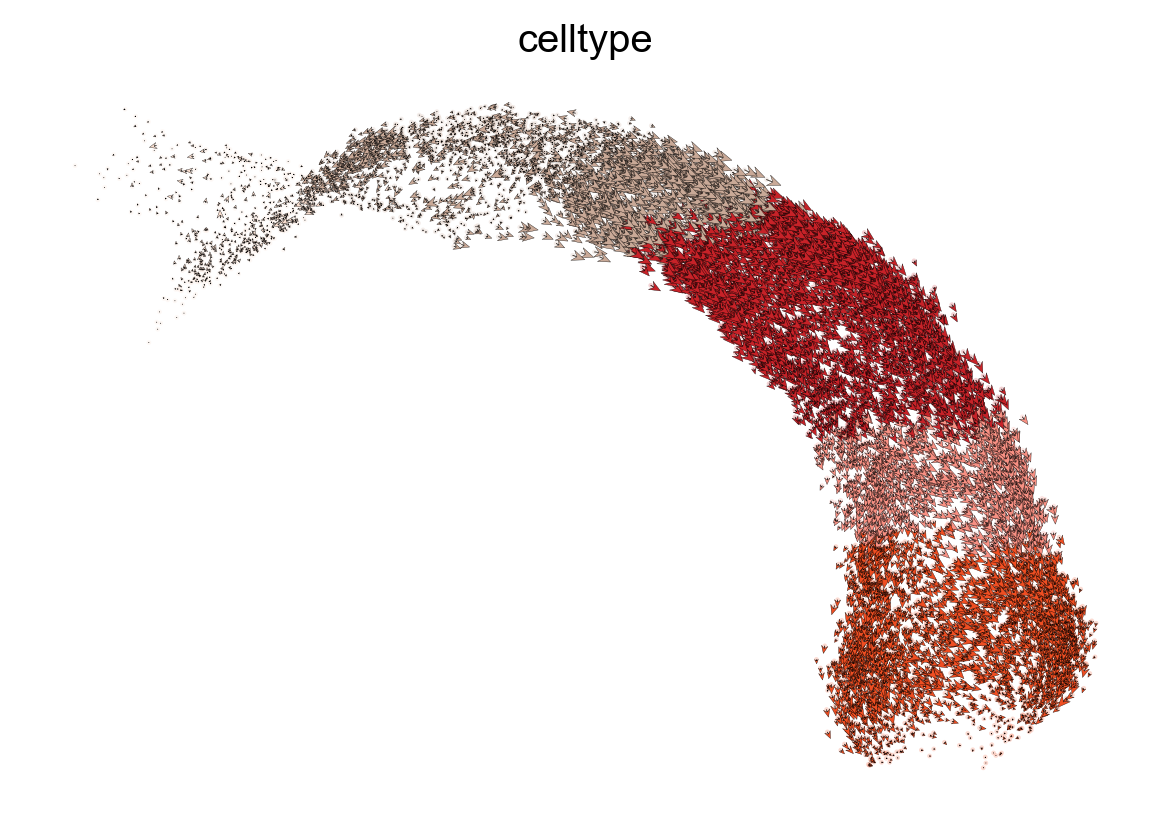

In [16]:
mc.acc_embedding(adata, color="celltype", basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

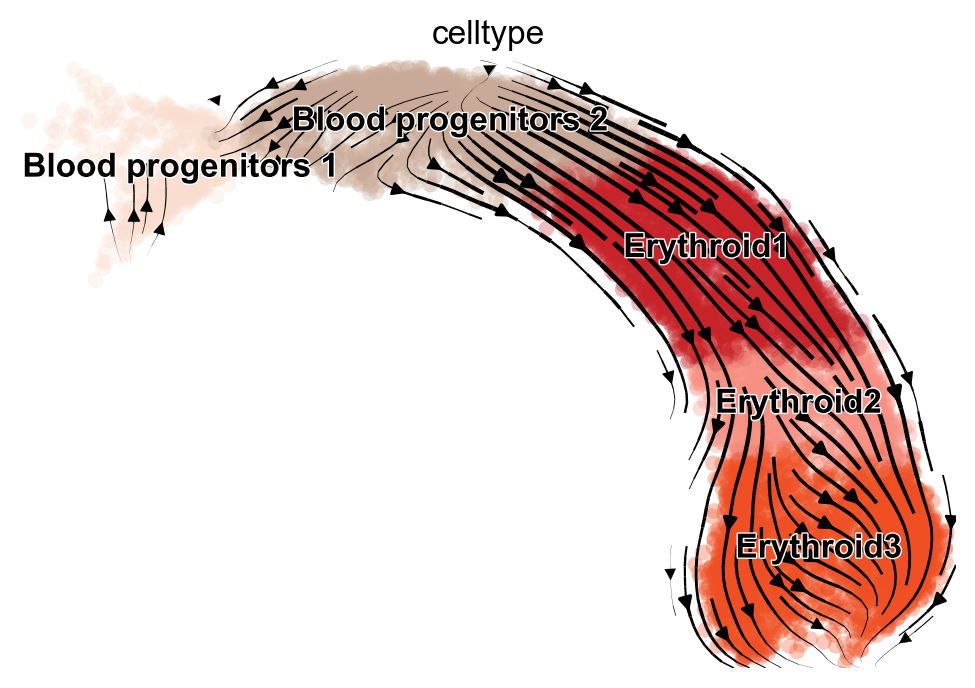

In [17]:
mc.acc_embedding_stream(adata, color="celltype")

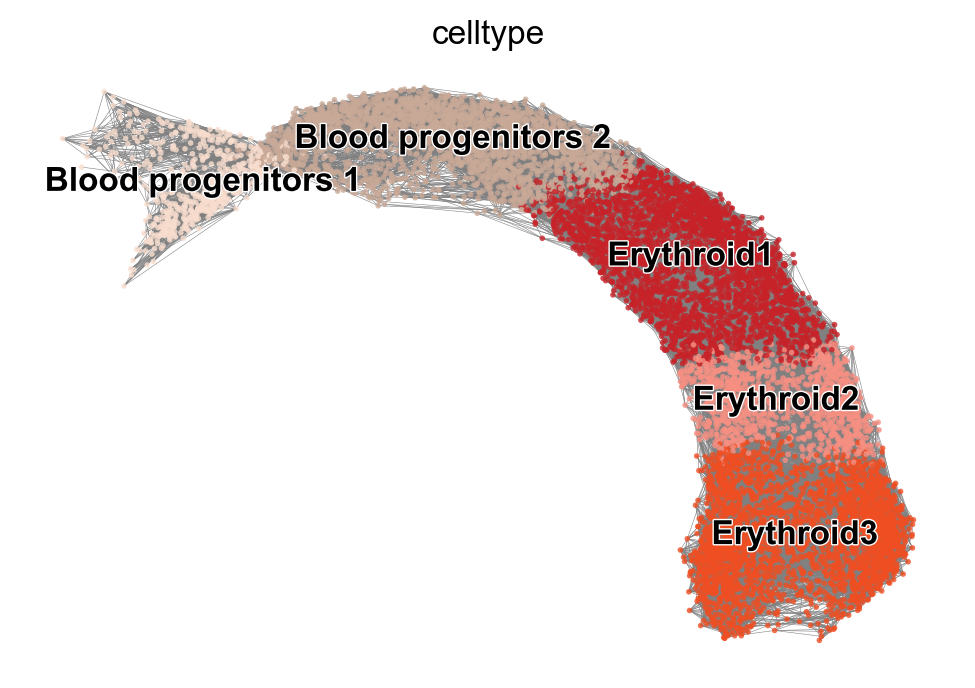

In [18]:
mc.acc_graph(adata, color="celltype")

In [23]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

mt.paga(adata, groups='celltype')
df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')

running PAGA using priors: ['acc_pseudotime']
    finished (0:00:05) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', acc transitions (adata.uns)


C:\Users\Pradip\AppData\Roaming\Python\Python310\site-packages\networkx\convert.py:158: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  return nx.from_scipy_sparse_matrix(data, create_using=create_using)


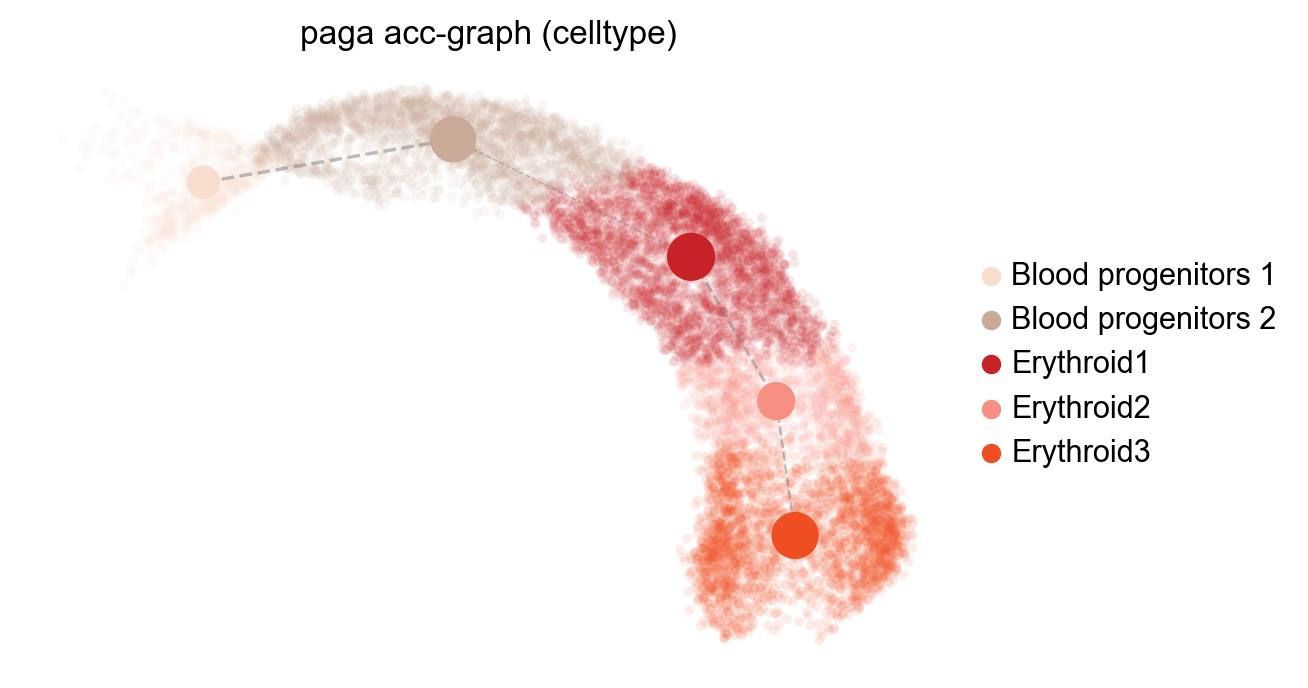

In [24]:
mc.paga(adata, color="celltype", basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)

--> added 'acc_length' (adata.obs)
--> added 'acc_confidence' (adata.obs)


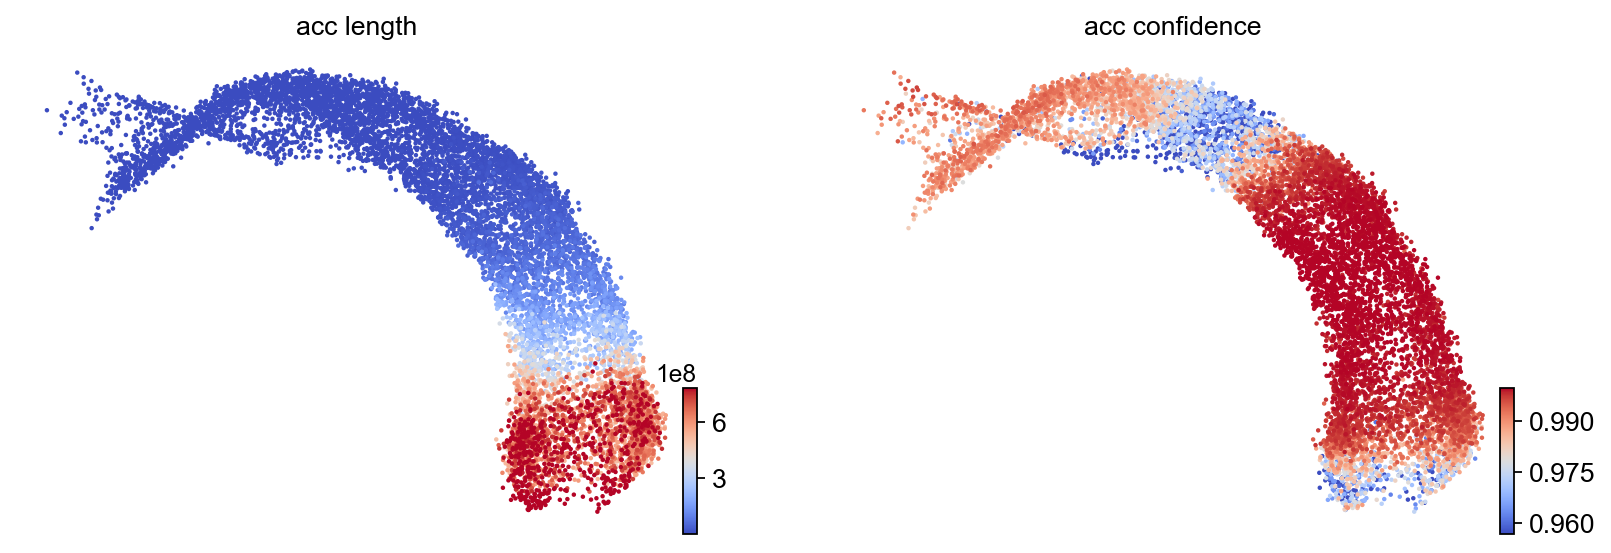

In [25]:
mt.acc_confidence(adata)
keys = 'acc_length', 'acc_confidence'
mc.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])